## Introduction to Scikit-Learn

Let's revisit the 6-steps Machine Learning framework from earlier.

<img src="../01_sample_project/6-step-ml-framework.png" style="background-color: white">

Here are the tools that we can use:

<img src="./images/ml101-6-step-ml-framework-tools.png" style="background-color: white">

We are going to start getting into the Machine Learning and writing Machine Learning code.

To do so, we are going to be using Scikit-Learn.

### What is Scikit-Learn (sklearn)?

* It is a Python Machine Learning (ML) library
* If we have data, it helps us build ML models, to:
    * Make predictions 
    * or learn patterns within that data, then make predictions
* It also implements tools to help us evaluate those predictions whether they are good or bad

### Why do we use Scikit-Learn?

* Built on NumPy and Matplotlib (and Python)
* Has many built-in ML models
* Methods to evaluate your ML models
* Very well-designed API

Here is what we are going to cover:

<img src="./images/sklearn-workflow-title.png" style="background-color: white">

Summary of Topics:

0. An end-to-end Scikit-Learn workflow
1. Getting data ready (to be used with Machine Learning models)
2. Choosing a machine learning model
3. Fitting a model to a data (learning patterns) and Making predictions with a model (using patterns)
4. Evaluating model predictions
5. Improving model predictions
6. Saving and loading models
7. Putting it all together!

In [1]:
import numpy as np

# one way to show complete documentation of any function(source: https://stackoverflow.com/questions/63200181/show-complete-documentation-in-vscode)
# np.random.randint? # put the ? at the end

## 0. An end-to-end Scikit-Learn Workflow

### 1. Getting the data ready

In [2]:
import pandas as pd

heart_disease = pd.read_csv("./data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# X is essentially a features matrix which contains the data in the columns
X = heart_disease.drop("target", axis=1) # we want all data except for the target column

# y is the labels target column where we will train the ML model and make predictions
y = heart_disease["target"]

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### 2. Choosing a Machine Learning model and the Hyperparameters

In [6]:
# Let's try the Random Forest ML model which is one type of classification learning model
# It is capable of learning patterns in data and then classifying whether a sample aka "a row" is one type or the other

# first we import the library
from sklearn.ensemble import RandomForestClassifier

# then, we instantiate that class using clf
clf = RandomForestClassifier()

# we'll keep the default hyperparameters for now
clf.get_params() # see what parameters the model is currently using

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3. Fitting the model to the training data

In [7]:
# first we need to train our model on the training data set
from sklearn.model_selection import train_test_split

# what this code is doing is that it splits the X and y data into training (X_train and y_train) and testing (X_test, y_test) data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% of the data will be used for training, 20% will be used for testing

# what this code is doing is that it gets the random forest classifier model to find patterns in the training data
clf.fit(X_train, y_train);

### Now, our model is fit to the training data! Let's make a prediction!

In [8]:
# let's try to make a prediction!
import numpy as np

# y_label = clf.predit(np.array([0, 2, 3, 4])) # we need to pass a numpy array in the predict function
# the above example didn't work out because our model can't make predictions on data that aren't the same shape (scikit learn is built on numpy)

# so to fix that, we get our model to predict using the testing data which has the same shape
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [9]:
np.array(y_test)

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

### 4. Evaluate the model on the training and testing data

In [10]:
# Using training data
clf.score(X_train, y_train)

1.0

From the above, the model has found patterns in the training data so well that it got 100% mean accuracy score.

In [11]:
# Using testing data
clf.score(X_test, y_test)

0.8032786885245902

There are some more metrics that we can use:

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [13]:
classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.86      0.76      0.81        33\n           1       0.75      0.86      0.80        28\n\n    accuracy                           0.80        61\n   macro avg       0.81      0.81      0.80        61\nweighted avg       0.81      0.80      0.80        61\n'

So, what this shows us is some classification metrics that compare the test labels (y_test) with the prediction labels (y_preds)

In [14]:
# let's try another metrics
confusion_matrix(y_test, y_preds)

array([[25,  8],
       [ 4, 24]], dtype=int64)

In [15]:
accuracy_score(y_test, y_preds)

0.8032786885245902

### 5. Improve the model predictions

In [16]:
# Try different amount of n_estimators and see the different accuracy scores
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(f"Model accuracy on test data set: {clf.score(X_test, y_test) * 100:.2f}%\n")

Trying model with 10 estimators...
Model accuracy on test data set: 78.69%

Trying model with 20 estimators...
Model accuracy on test data set: 88.52%

Trying model with 30 estimators...
Model accuracy on test data set: 83.61%

Trying model with 40 estimators...
Model accuracy on test data set: 85.25%

Trying model with 50 estimators...
Model accuracy on test data set: 83.61%

Trying model with 60 estimators...
Model accuracy on test data set: 83.61%

Trying model with 70 estimators...
Model accuracy on test data set: 80.33%

Trying model with 80 estimators...
Model accuracy on test data set: 83.61%

Trying model with 90 estimators...
Model accuracy on test data set: 78.69%



### From the above, we can see that the highest accuracy score is by adjusting the hyperparameter n_estimators with 60 estimators

### 6. Saving and loading trained models

In [17]:
# First we want to save the model
# example here is using the pickle library
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb")) # wb = write binary

In [18]:
# Then, let's try to import the model
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb")) # rb = read binary

loaded_model.score(X_test, y_test) # the score should be from the last model that we tested

0.7868852459016393

### 7. Putting it all together!

In [19]:
# how to check the version of sklearn
import sklearn

sklearn.show_versions()


System:
    python: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
executable: c:\Users\ahmad\anaconda3\python.exe
   machine: Windows-10-10.0.22631-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 23.3.1
   setuptools: 68.2.2
        numpy: 1.26.4
        scipy: 1.11.4
       Cython: None
       pandas: 2.1.4
   matplotlib: 3.8.0
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\ahmad\anaconda3\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 14
threading_layer: intel

       filepath: C:\Users\ahmad\anaconda3\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 20


In [20]:
# Create a list for the topics that we will be covering
summary_topics = [
    "0. An end-to-end Scikit-Learn workflow", 
    "1. Getting data ready (to be used with Machine Learning models)",
    "2. Choosing a machine learning model",
    "3. Fitting a model to a data (learning patterns) and Making predictions with a model (using patterns)",
    "4. Evaluating model predictions",
    "5. Improving model predictions",
    "6. Saving and loading models",
    "7. Putting it all together!"]

In [21]:
summary_topics

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting data ready (to be used with Machine Learning models)',
 '2. Choosing a machine learning model',
 '3. Fitting a model to a data (learning patterns) and Making predictions with a model (using patterns)',
 '4. Evaluating model predictions',
 '5. Improving model predictions',
 '6. Saving and loading models',
 '7. Putting it all together!']

## 1. Getting the data ready to be used with Machine Learning models

Three main things that we have to do:
1. Split the data into features ("X") and labels ("y")
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [22]:
# Let's start with the dataset
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1. Split the data into features ("X") and labels ("y")

In [23]:
X = heart_disease.drop("target", axis=1) # 0=rows, 1=columns
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
# Now, split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

We have done step 1! Time for the next step!

## Data Science Quick Tip: Clean, Transform, Reduce

* Clean Data: Remove a row/ column that's empty or has missing fields/ values e.g. Null, or calculate average prices

* Transform Data: Transform data into some sort of form that a computer can understand e.g. change the data type to numbers, convert colors into numbers

* Reduce Data: The more data we have, the more CPU, energy we need to run our computation (called dimensionality/ columns reduction), remove columns that we don't need to use

### 1.1 Make sure the data is all numerical (extra step)

Let's look at anothe example and make a prediction

In [27]:
# Let's use the car sales dataset
car_sales = pd.read_csv("./data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [28]:
len(car_sales)

1000

In [29]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [30]:
# Let's split the data into features (X) and labels (y)
X = car_sales.drop("Price", axis=1)

y = car_sales["Price"]

In [31]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [32]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [33]:
# Now, let's split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)


In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [35]:
# Choose another ML model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

If we run the code above, we will get the error, `ValueError: could not convert string to float: "Nissan".`

Our machine learning model cannot deal with strings.

This is the reason why we need to make sure that our data is all numerical.

Let's see how we deal with this situation with sklearn.

In [37]:
# turn categories into numbers

# First, import these libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
# then define the features to turn into numbers
categorical_features = ["Make", "Colour", "Doors"]

In [39]:
# Doors are also considered categorical in our case e.g. there are 856 cars under the 4 doors category
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [40]:
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                  remainder="passthrough") # accepts a list of tuple

transformed_X = transformer.fit_transform(X) # the version of X but turned into numbers
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [41]:
# let's put the transformed_X data into a dataframe so we could visualize the data better
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [42]:
# we create dummies to get the indicators
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [43]:
# Now that the data is in numbers, let's refit our model

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
model.score(X_test, y_test)

0.3235867221569877

The ML model is now able to make predictions now (eventhough the score is low) because our data is all numerical!

### 1.2 What if there were missing values in the dataset?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [45]:
# Import car sales extended missing data

car_sales_missing = pd.read_csv("./data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
car_sales_missing.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [47]:
# car_sales_missing.isna().values.any()
car_sales_missing.isna().any()

Make             True
Colour           True
Odometer (KM)    True
Doors            True
Price            True
dtype: bool

In [48]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
# split the data into features (X) and labels (y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [50]:
# Again, convert the categorical data into numbers like we did beforea
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# define the features
categorical_features = ["Make", "Colour", "Doors"]

# initialize
one_hot = OneHotEncoder(sparse_output=False) # we put the parameter sparse_output=False to return the values in narray instead of a sparse matrix
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)], 
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [51]:
# Check categories of OneHotEncoder by indexing into it
transformer.transformers_[0][1].categories_

[array(['BMW', 'Honda', 'Nissan', 'Toyota', nan], dtype=object),
 array(['Black', 'Blue', 'Green', 'Red', 'White', nan], dtype=object),
 array([ 3.,  4.,  5., nan])]

In [52]:
# turn the transformed_X into a dataframe
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35820.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,215883.0


In [53]:
# get the categorical indicators
dummies = pd.get_dummies(car_sales_missing[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,False,True,False,False,False,False,False,False,True
1,5.0,True,False,False,False,False,True,False,False,False
2,4.0,False,True,False,False,False,False,False,False,True
3,4.0,False,False,False,True,False,False,False,False,True
4,3.0,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4.0,False,False,False,True,True,False,False,False,False
996,3.0,False,False,False,False,False,False,False,False,True
997,4.0,False,False,True,False,False,True,False,False,False
998,4.0,False,True,False,False,False,False,False,False,True


Notice the above does not include the NaN columns.

In [54]:
# Let's try to make a prediction with the data that contains missing values. Why not? 😊

# First, split the data into training and testing sets
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 16), (200, 16), (800,), (200,))

In [56]:
# we are still using the RandomForestRegressor model from earlier
# model.fit(X_train, y_train) # running this results in ValueError: Input X contains NaN

#### Alas, we cannot make a prediction with data that contains missing values!

So, let's fill the missing data!

#### Option 1: Fill missing data with Pandas

In [57]:
# Fill the missing data in the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the missing data in the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the missing data in the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the missing data in the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True) # in this case, we fill the missing data with 4 since it has the highest value counts

In [58]:
# Check our dataframe after the missing data has been filled
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [59]:
# Remove the 50 rows with missing prices (it's ok to remove because this is what we are going to predict anyway)
car_sales_missing.dropna(inplace=True)

In [60]:
# check our dataframe again after removing the rows with missing Prices
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [61]:
len(car_sales_missing)

950

#### Well since our dataset has no more missing values, let's try to make the predictions again!

In [62]:
# Resplit our data into features (X) and labels (y)
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [63]:
# again, let's turn the categorical data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder(sparse_output=False)
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [64]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


In [65]:
dummies = pd.get_dummies(car_sales_missing[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,4.0,False,True,False,False,False,False,False,False,False,True,False
1,5.0,True,False,False,False,False,False,True,False,False,False,False
2,4.0,False,True,False,False,False,False,False,False,False,True,False
3,4.0,False,False,False,True,False,False,False,False,False,True,False
4,3.0,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,False,False,False,True,False,True,False,False,False,False,False
996,3.0,False,False,False,False,True,False,False,False,False,True,False
997,4.0,False,False,True,False,False,False,True,False,False,False,False
998,4.0,False,True,False,False,False,False,False,False,False,True,False


In [66]:
# Resplit the data into training and testing
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((760, 15), (190, 15), (760,), (190,))

In [68]:
# again, we use RandomForestRegressor
model.fit(X_train, y_train)

RandomForestRegressor()

#### Success! We can fit the data to the model!

In [69]:
model.score(X_test, y_test)

0.22011714008302485

#### Option 2: Fill missing data and transform categorical data with Scikit-learn

In [70]:
# re-use the data set with the missing values
car_sales_missing_ = pd.read_csv("./data/car-sales-extended-missing-data.csv")
car_sales_missing_

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [71]:
# verify that there's missing data again
car_sales_missing_.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [72]:
# Drop the rows with no labels
car_sales_missing_.dropna(subset=["Price"], inplace=True)

# then check how many missing data again
car_sales_missing_.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [73]:
# Now, we can split the data into features (X) and labels (y)
X = car_sales_missing_.drop("Price", axis=1)
y = car_sales_missing_["Price"]

In [74]:
# Next, we need to split the data into training and testing. 
# Note: It's best to fill and transform training and test sets separately

# The main takeaways:
# Split your data first (into train/test)
# Fill/transform the training set and test sets separately

from sklearn.model_selection import train_test_split

np.random.seed(42) # for reproduction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
# check for missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

So, how would we fill the missing data with scikit-learn?

In [76]:
# imputing is simply filling up missing values
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing") # cat = category
door_imputer = SimpleImputer(strategy="constant", fill_value=4) # because of similar reason we did before
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"] # we separate the door feature because it is half-categorical, half-numerical
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
                             ])

# Fill training and testing data values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)

In [77]:
# Check the filled training data
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [78]:
# get our transformed and filled data into a dataframe
car_sales_filled_train = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_test = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

In [79]:
car_sales_filled_train.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0


In [80]:
# check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

Perfect! Now we can transform the categorical data into numerical with the OneHotEncoder!

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder(sparse_output=False)
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)], 
                                  remainder="passthrough")

transformed_filled_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_filled_X_test = transformer.fit_transform(car_sales_filled_test)

In [82]:
# try something I saw from youtube
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer((OneHotEncoder(), ["Make", "Colour", "Doors"]), remainder="passthrough")

In [83]:
pd.DataFrame(transformed_filled_X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,71934.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,162665.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42844.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,195829.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,219217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,218803.0
756,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,245427.0
757,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,196225.0
758,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,133117.0


In [84]:
dummies = pd.get_dummies(car_sales_filled_train[["Make", "Colour", "Doors"]])
dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing,Doors_3.0,Doors_4.0,Doors_5.0
0,False,True,False,False,False,False,False,False,False,True,False,False,True,False
1,False,False,False,True,False,False,False,False,True,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,True,False,False,True,False
3,False,True,False,False,False,False,False,False,False,True,False,False,True,False
4,False,True,False,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,False,False,False,True,False,False,False,False,False,False,True,False,True,False
756,True,False,False,False,False,False,True,False,False,False,False,False,False,True
757,False,False,False,True,False,False,False,False,False,True,False,False,True,False
758,False,True,False,False,False,False,True,False,False,False,False,False,True,False


In [85]:
# Let's try to fit a model with the transformed training data
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(transformed_filled_X_train, y_train)

RandomForestRegressor()

In [86]:
# Let's check the model prediction accuracy score
model.score(transformed_filled_X_test, y_test)

0.25366332156443805

In [87]:
len(transformed_filled_X_train), len(transformed_filled_X_test), len(car_sales)

(760, 190, 1000)

In [88]:
len(transformed_filled_X_train) + len(transformed_filled_X_test)

950

There are 50 less data compared to the original data set because we dropped 50 missing rows in the Price column.

## 2. Choosing the right machine learning model for our problems.

Some things to take note:

* Scikit-learn refers machine learning algorithms, models as <b><u>estimators</u></b>
* Within those estimators, they have classifiers, regressors
* Classification problem - we are predicting a category. So it is probably one thing or the other.
    * Sometimes you'll see `clf` (classifier) used as a classification estimator.
    * Regression problem - predicting a number such as the selling price of a car.

### Scikit-Learn Machine Learning Models Map

<img src="./images/sklearn-ml-map.png">

### 2.1 Picking a machine learning model for a regression problem (aka predicting a number)

Let's use the California Housing dataset!


In [89]:
# Get/ fetch the California Housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
housing


{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [90]:
# create the dataframe from the features columns
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

In [91]:
# add the target column
housing_df["MedHouseVal"] = housing["target"]

In [92]:
housing_df.shape

(20640, 9)

In [93]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [94]:
housing_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [95]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Here is some information about the data set:

Attribute Information:

* MedInc median income in block group

* HouseAge median house age in block group

* AveRooms average number of rooms per household

* AveBedrms average number of bedrooms per household

* Population block group population

* AveOccup average number of household members

* Latitude block group latitude

* Longitude block group longitude


* The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

* This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

* A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.



In [96]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [97]:
housing_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [98]:
# split our data into features (X) and target (y)
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"] # median house value expressed in $100,000

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features = []
# one_hot = OneHotEncoder(sprase_output=False)
# transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

According to the ML map shown earlier, we need to choose the right Regression model but we have to do some experimentation on which model that performs the best.

In [101]:
# import the algorithm/ estimator
from sklearn.linear_model import Ridge
import numpy as np

np.random.seed(42) # for reproduction
model = Ridge() # instantiate the model
model.get_params() # get the default parameters of the model

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [102]:
# fit the model with the training data set
model.fit(X_train, y_train)

Ridge()

In [103]:
# check the score of the model
model.score(X_test, y_test)

0.5783803894004869

The score of the model actually refers to the Coefficient of Determination also known as R-squared (R²).

R² assesses how strong the linear relationship is between two variables.

In [104]:
# Let's try another algorithm/ estimator
from sklearn.linear_model import Lasso

np.random.seed(42)

model = Lasso()
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [105]:
model.fit(X_train, y_train)

Lasso()

In [106]:
model.score(X_test, y_test)

0.28395171339896597

In [107]:
# Let's try another algorithm/ estimator
from sklearn.svm import SVR

np.random.seed(42)

model = SVR()
model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [108]:
model.fit(X_train, y_train)

SVR()

In [109]:
model.score(X_test, y_test)

-0.022079140261957564

In [110]:
from sklearn.linear_model import LassoLars

np.random.seed(42)

model = LassoLars()
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'eps': 2.220446049250313e-16,
 'fit_intercept': True,
 'fit_path': True,
 'jitter': None,
 'max_iter': 500,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'verbose': False}

In [111]:
model.fit(X_train, y_train)

LassoLars()

In [112]:
model.score(X_test, y_test)

0.28394997461828697

In [113]:
from sklearn.linear_model import ElasticNet

np.random.seed(42)

model = ElasticNet()
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [114]:
model.fit(X_train, y_train)

ElasticNet()

In [115]:
model.score(X_test, y_test)

0.4168294186352314

What if `Ridge` and other algorithms/estimators didn't work or the score didn't fit our needs?

Well, we could always try different model.

How about we try an ensemble model?

An ensemble is a combination of smaller models to try and make than just a single model.

Here is an article about Random Forest: https://willkoehrsen.github.io/data%20science/machine%20learning/random-forest-simple-explanation/

In [116]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model = RandomForestRegressor()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [117]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [118]:
model.score(X_test, y_test)

0.8012774167558389

## 2.2 Picking a Machine Learning model for a Classification problem

Let's get a data set that is a classification problem. 

In [119]:
heart_disease = pd.read_csv("./data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [120]:
# check the number of samples
len(heart_disease)

303

### From the ML map, let's try the linear SVC algorithm/ estimator!

In [121]:
# split the data into features (X) and target (y)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [122]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [123]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [124]:
# split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [126]:
# import the linear Support Vector Classification (aka linear SVC) algorithm/ estimator
from sklearn.svm import LinearSVC

np.random.seed(42)

model = LinearSVC() # instantiate the model
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [127]:
# fit the training data to the model
model.fit(X_train, y_train)

c:\Users\ahmad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [128]:
# check the model accuracy score
model.score(X_test, y_test)

0.8032786885245902

### Let's try to use RandomForestClassifier and see the difference with LinearSVC

In [129]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [130]:
# fit the training data to the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [131]:
# evaluate the model's accuracy
model.score(X_test, y_test)

0.819672131147541

### In our case, the RandomForestClassifier performs slightly better than the LinearSVC algorithm/ estimator.

Tidbit:

1. If you have structured data (aka data used in a dataframe), use ensemble methods.
2. If you have unstructured data, use deep learning or transfer learning.

## Let's revisit our summary of topics to cover:

In [132]:
summary_topics

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting data ready (to be used with Machine Learning models)',
 '2. Choosing a machine learning model',
 '3. Fitting a model to a data (learning patterns) and Making predictions with a model (using patterns)',
 '4. Evaluating model predictions',
 '5. Improving model predictions',
 '6. Saving and loading models',
 '7. Putting it all together!']

We have covered from topic 0 to 2 so far. Let's go to topic no 3

## 3. Fitting a model/agorithm to a data and make predictions on our data.

### 3.1 Fitting the model to the data.

Note: Different names for:
* `X` = features, features variables, data
* `y` = labels, target variables, targets

In [133]:
# taken from previous RandomForestClassifier
# import the library
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# instantiate the model
model = RandomForestClassifier()

# fit the model to the data
model.fit(X_train, y_train)

# evaluate the model
model.score(X_test, y_test)

0.819672131147541

In [134]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [135]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### When we are fitting the training data to the model, it means we are training the machine learning model.

### When we evaluate the model, it means we are using the patterns that the model has learned.

### 3.2 Make predictions using a machine learning model.

2 ways to make predictions:

1. `predict()`
2. `predict_proba()`

In [136]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2


In [137]:
# Use a trained model to make predictions
model.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [138]:
np.array(y_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [139]:
# Compar predictions to truth labels (y_test) to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.9672131147540983

In [140]:
model.score(X_test, y_test)

0.819672131147541

In [141]:
# there's one more way
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.9672131147540983

### Now, make predictions with `predict_proba()`

In [142]:
# predict_proba() returns probability estimates of a classification label (in our case, 0: no heart disease, 1: yes heart disease)
model.predict_proba(X_test[:5])

array([[0.08, 0.92],
       [0.6 , 0.4 ],
       [0.02, 0.98],
       [0.06, 0.94],
       [0.18, 0.82]])

In [143]:
# Let's use predict() on the same data
model.predict(X_test[:5])

array([1, 0, 1, 1, 1], dtype=int64)

In [144]:
heart_disease["target"].value_counts() # 1: has heart disease, 0: no heart disease

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used for regression models.

In [145]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# split data into features and labels
X = housing_df.drop("MedHouseVal", axis=1) # drop the label/ target column
y = housing_df["MedHouseVal"]

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instantiate the Random Forest Regressor algorithm/ estimator
model = RandomForestRegressor()
model.get_params()

# fit the training data to the model
model.fit(X_train, y_train)

# make predictions
y_preds = model.predict(X_test)

In [147]:
y_preds[:10] # see the first 10 results

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [148]:
# we want our predictions to be in the same format as the target "MedHouseVal"

# let's see again our target (first 10 results)
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

How do we compare the predictions with the truth (correct) target values?

Let's take a look at one of sklearn's regression evaluation metrics.

In [149]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.32659871732073664

So, what does it mean?

It means that each of our model predictions is 0.32 different than the truth (correct) target values.

## 4. Evaluating a machine learning model

There are three in-built ways to evaluate sklearn models/ estimators/ algorithms:

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem specific metric functions

### 4.1 Evaluating a model with the `score()` method.

First, use the `score()` method on a classification problem.

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# split the data into features and labels
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate the model
model = RandomForestClassifier()

# fit the training data to the model
model.fit(X_train, y_train)

# check the accuracy of the model
model.score(X_test, y_test) # the default score() evaluation metric is mean accuracy for classification algorithms

0.8524590163934426

In [151]:
from sklearn.metrics import accuracy_score

y_preds = model.predict(X_test)

accuracy_score(y_test, y_preds)

0.8524590163934426

Let's use `score()` method on a regression problem:

In [152]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test) # the default score() evaluation metric is r_squared for regression algorithms

0.8065734772187598

In [153]:
from sklearn.metrics import r2_score

y_preds = model.predict(X_test)

r2_score(y_test, y_preds)

0.8065734772187598

### 4.2 Evaluating a model with the `scoring` parameter.

First, use the `scoring` parameter on a classification problem.

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()

model.fit(X_train, y_train)

model.score(X_test, y_test) # returns the mean accuracy

0.8524590163934426

In [155]:
cvs = cross_val_score(model, X, y) # returns an array of scores where the default no of cross-validation is 5
cvs

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

So, what is cross-validation in the first place?

Let's take a look here:

<img src="./images/sklearn-cross-validation.png">

So, cross-validation trains 5 different version of the model (in the case of cv=5 (default) aka 5-fold) and then it evaluates based on each model.

Model is trained on 5 different versions of training data, and evaluated on 5 different versions of the test data.

In [156]:
# let's see both of them in action together

np.random.seed(42)

# single score
model_single_score = model.score(X_test, y_test)

# mean of 5-fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model, X, y))

# compare between the 2 of them
model_single_score, model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

We can see above that when we cross-validated 5 times, the score is slightly lower.

When we are reporting the accuracy of our model, we prefer the results from the cross-validation metrics than the single score.

However, we haven't used the `scoring` parameter because by default, the `scoring` parameter is set to `None` for `cross_val_score()`.

When `scoring` is `None`, it uses the default evaluation metrics of the model (estimator’s default scorer). 

In our case, the default scoring parameter for classification is mean accuracy.

More info here: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [157]:
cross_val_score(model, X, y, scoring="roc_auc")

array([0.87662338, 0.95562771, 0.89772727, 0.89674523, 0.8664422 ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**1. Accuracy**

In [158]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

model = RandomForestClassifier()

model_cross_val_score = cross_val_score(model, X, y)

In [159]:
np.mean(model_cross_val_score)

0.8248087431693989

In [160]:
print(f"Heart Disease Cross-Validation Classifier Accuracy: {np.mean(model_cross_val_score)*100:.2f}%")

Heart Disease Cross-Validation Classifier Accuracy: 82.48%


**2. Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* Receiver Operating Characteristic (ROC) curve: 

A comparison of a model's true postive rate (tpr) Vs a model's false positive rate (fpr)

    * True positive = model predicts 1 (e.g. has heart disease) when truth is 1 
    * False positive = model predicts 1 (e.g. has heart disease) when truth is 0
    * True negative = model predicts 0 (e.g. no heart disease) when truth is 0
    * False negative = model predicts 0 (e.g. no heart disease) when truth is 1

In [161]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions with probabilities
y_proba = model.predict_proba(X_test)

In [162]:
y_proba[:10] # look at the first 10 predictions

array([[0.59, 0.41],
       [0.19, 0.81],
       [0.52, 0.48],
       [0.73, 0.27],
       [0.49, 0.51],
       [0.12, 0.88],
       [0.32, 0.68],
       [0.97, 0.03],
       [0.17, 0.83],
       [0.46, 0.54]])

In [163]:
y_proba_positive = y_proba[:, 1] # slice to get only column index 1 for positive class
y_proba_positive[:10]

array([0.41, 0.81, 0.48, 0.27, 0.51, 0.88, 0.68, 0.03, 0.83, 0.54])

In [164]:
y_proba_negative = y_proba[:, 0] # slice to get only column index 0 for negative class
y_proba_negative[:10]

array([0.59, 0.19, 0.52, 0.73, 0.49, 0.12, 0.32, 0.97, 0.17, 0.46])

In [165]:
# Calculate fpr, tpr and thresholds
from sklearn.metrics import roc_curve

fpr, tpt, thresholds = roc_curve(y_test, y_proba_positive)

In [166]:
# Check the false positive rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.31034483,
       0.34482759, 0.34482759, 0.37931034, 0.37931034, 0.48275862,
       0.48275862, 0.55172414, 0.55172414, 0.5862069 , 0.65517241,
       0.75862069, 0.86206897, 0.89655172, 0.96551724, 1.        ])

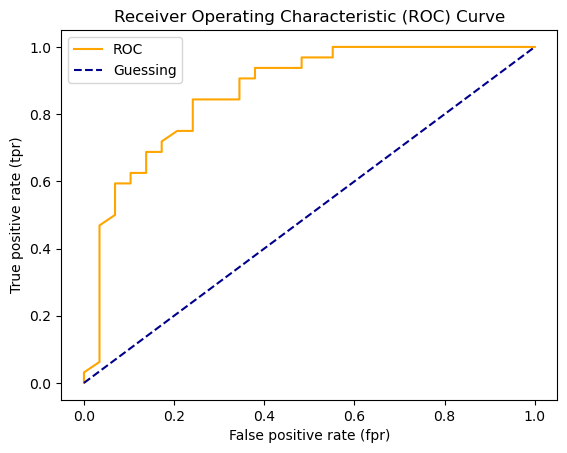

In [167]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpt)


In [168]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba_positive)

0.8658405172413793

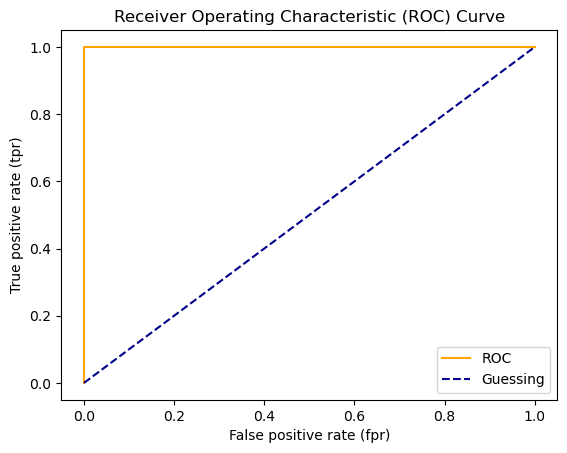

In [169]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [170]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**In reality, a perfect ROC curve is highly unlikely. That means you don't have any false positives and everything is true positives.** 

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

**3. Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, it is giving you an idea of where the model is getting confused.

In [171]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 7, 25]], dtype=int64)

In [172]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,22,7
1,7,25


In [173]:
22 + 7 + 7 + 25

61

In [174]:
len(y_preds)

61

Let's take a look at the Confusion Matrix Anatomy.

<img src="./images/sklearn-confusion-matrix-anatomy.png">

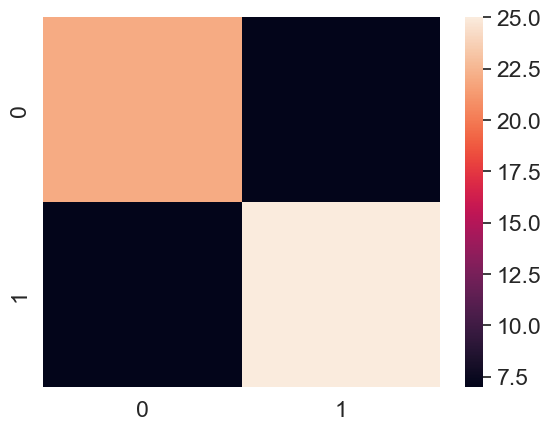

In [180]:
# Let's make our confusion matrix more visual with Seaborn's heatmap()

import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

In [181]:
# # steps to install a conda package into the current environment from a jupyter notebook
# import sys

# !conda install --yes --prefix {sys.prefix} seaborn